BDACoE CAPESTONE PROJECT

PROJECT TITLE: EXPLORATORY ANALYSIS OF CANCER DATA AND PREDICTIVE MODELING USING MACHINE LEARNING


In [71]:
# We will import all the necessary library modules used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns

First let's import the cancer2017 dataset...

In [53]:
df=pd.read_csv('D:\coehackathon\cancer-data-2017\cancer2017.csv',encoding='utf-8')

encoding parameter is used since cancer2017.csv contains some non-ASCII value which has to be encoded in utf-8 format

In [54]:
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,�,70,100,�,60,280,�,�,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


We could see that the non-ASCII values are interpretted as unicode block symbols i.e. �. It is replaced with NaN values

In [55]:
df.replace({r'[^\x00-\x7F]+':np.nan}, regex=True, inplace=True)
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


Next step is to clean the column names

In [56]:
df.columns = [c.strip() for c in df.columns.values.tolist()]
df.columns = [c.replace(' ','') for c in df.columns.values.tolist()]

Then we have to clean the cell values

In [57]:
#removing commas
for i in range(0,df.shape[0]):
    for j in range(1,df.shape[1]):
        if ',' in str(df.iloc[i][j]):
            df.iloc[i][j]=df.iloc[i][j].replace(',','')
df.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,3200,320,250,710,450
1,Alaska,NaN,70,100,NaN,60,280,NaN,NaN,80,50
2,Arizona,380,810,1020,550,660,2820,430,310,930,600
3,Arkansas,180,420,600,250,280,2160,210,150,430,260
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,3130


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
State                  51 non-null object
Brain/nervoussystem    47 non-null object
Femalebreast           51 non-null object
Colon&rectum           51 non-null object
Leukemia               49 non-null object
Liver                  49 non-null object
Lung&bronchus          51 non-null object
Non-HodgkinLymphoma    46 non-null object
Ovary                  45 non-null object
Pancreas               51 non-null object
Prostate               50 non-null object
dtypes: object(11)
memory usage: 4.5+ KB


All the columns except State has to be converted to numeric values

In [59]:
df=df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
State                  51 non-null object
Brain/nervoussystem    47 non-null float64
Femalebreast           51 non-null int64
Colon&rectum           51 non-null int64
Leukemia               49 non-null float64
Liver                  49 non-null float64
Lung&bronchus          51 non-null int64
Non-HodgkinLymphoma    46 non-null float64
Ovary                  45 non-null float64
Pancreas               51 non-null int64
Prostate               50 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ KB


In [60]:
df.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.0,650,940,420.0,470.0,3200,320.0,250.0,710,450.0
1,Alaska,NaN,70,100,NaN,60.0,280,NaN,NaN,80,50.0
2,Arizona,380.0,810,1020,550.0,660.0,2820,430.0,310.0,930,600.0
3,Arkansas,180.0,420,600,250.0,280.0,2160,210.0,150.0,430,260.0
4,California,1830.0,4440,5240,2610.0,3750.0,12000,2140.0,1530.0,4510,3130.0


We could notice that some of the cell values are NaN. Potting a data with null or NaN values will lead to data inconsistency. To rectify that we will be filling the missing values with the mean value of the corresponding column as stated in the exploratory data analysis.

In [61]:
y=list(df.columns)
bdf=df.copy()
for col in range(1,len(y)):
    bdf[y[col]].fillna((bdf[y[col]].mean()), inplace=True)
bdf.head()

,State,Brain/nervoussystem,Femalebreast,Colon&rectum,Leukemia,Liver,Lung&bronchus,Non-HodgkinLymphoma,Ovary,Pancreas,Prostate
0,Alabama,320.00000,650,940,420.000000,470.0,3200,320.000000,250.000000,710,450.0
1,Alaska,352.12766,70,100,499.387755,60.0,280,434.130435,309.333333,80,50.0
2,Arizona,380.00000,810,1020,550.000000,660.0,2820,430.000000,310.000000,930,600.0
3,Arkansas,180.00000,420,600,250.000000,280.0,2160,210.000000,150.000000,430,260.0
4,California,1830.00000,4440,5240,2610.000000,3750.0,12000,2140.000000,1530.000000,4510,3130.0


As we have successfully cleaned all the dirty data in our cancer2017 dataset, we could now proceed to creating visualizations.
We will be plotting both the cleaned data along with inconsistent data to show how exploratory data analysis could improvize an inconsistent dataset.

Visualization 1: Line Chart

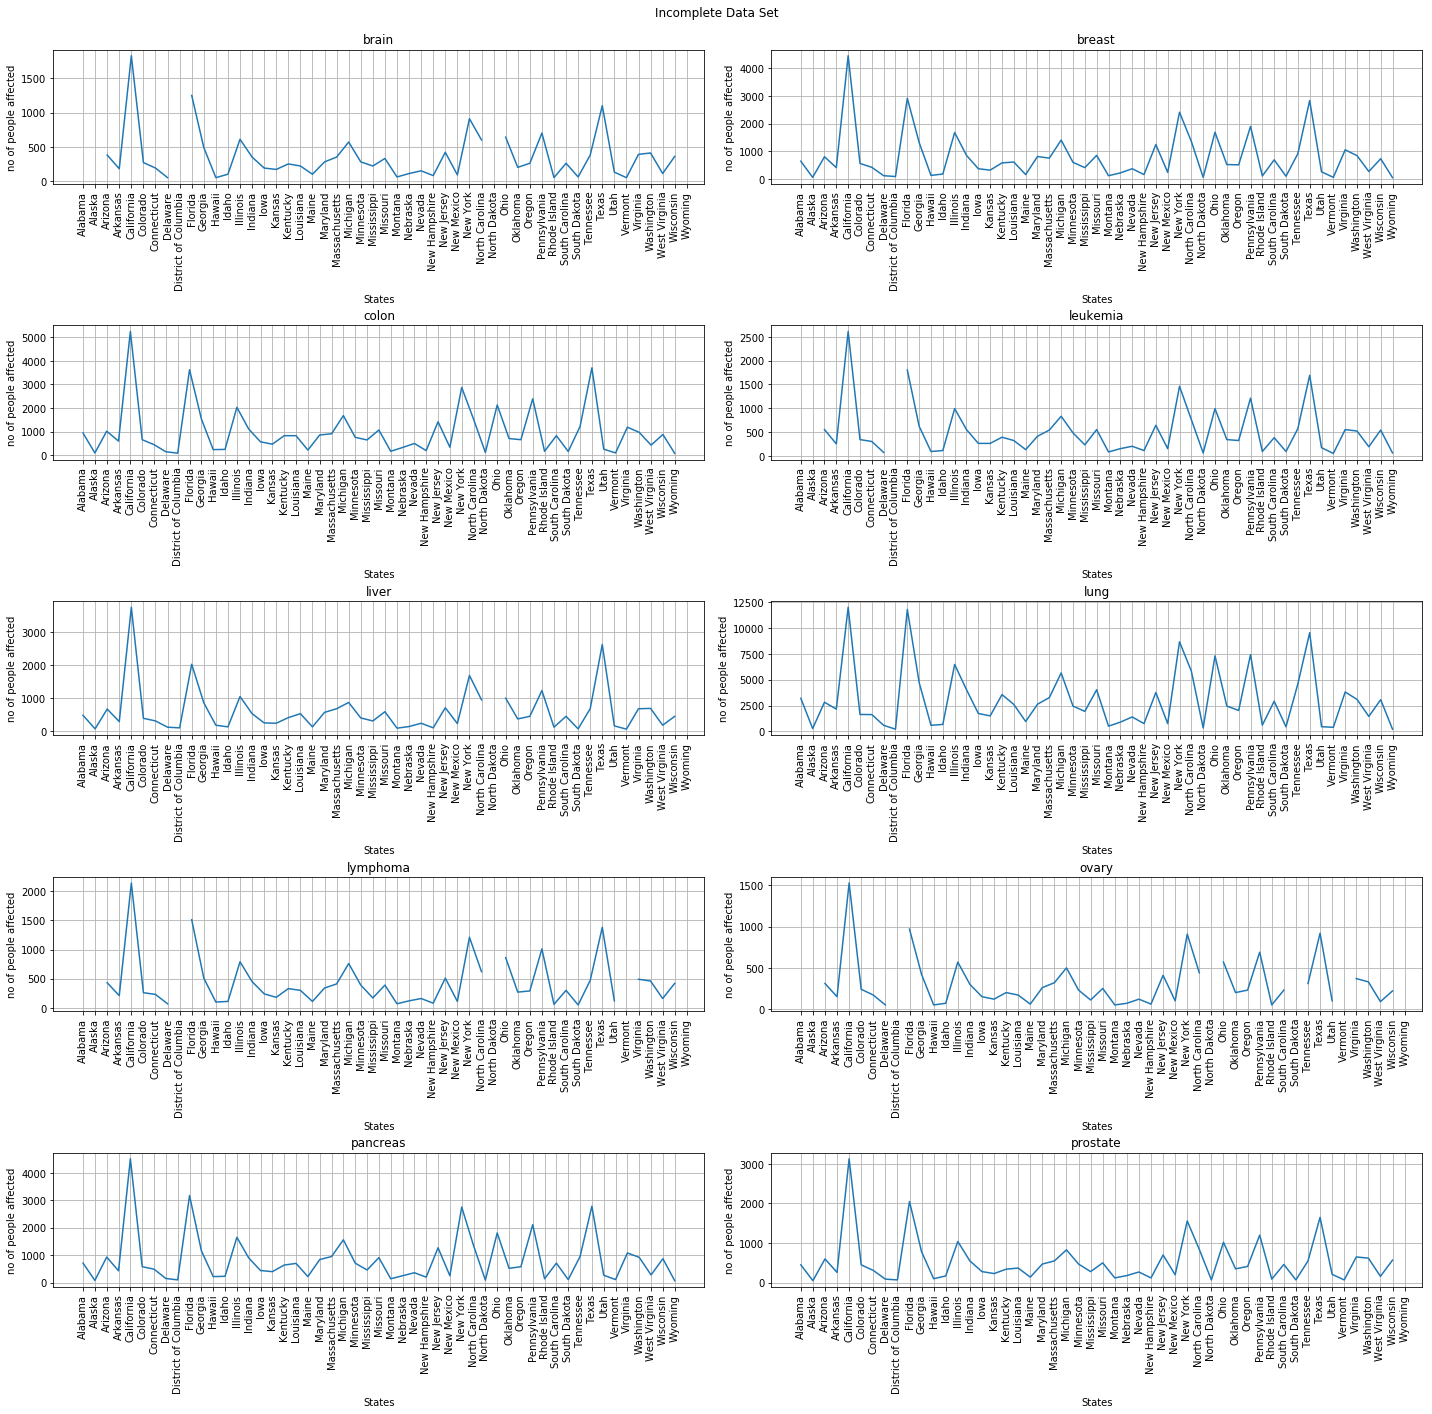

In [62]:
x='State'
i=1
z=["prostate","brain","breast","colon","leukemia","liver","lung","lymphoma","ovary","pancreas"]
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('Incomplete Data Set')
for row in ax:
    for col in row:
        col.plot(df[x],df[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

After fixing the inconsistent data

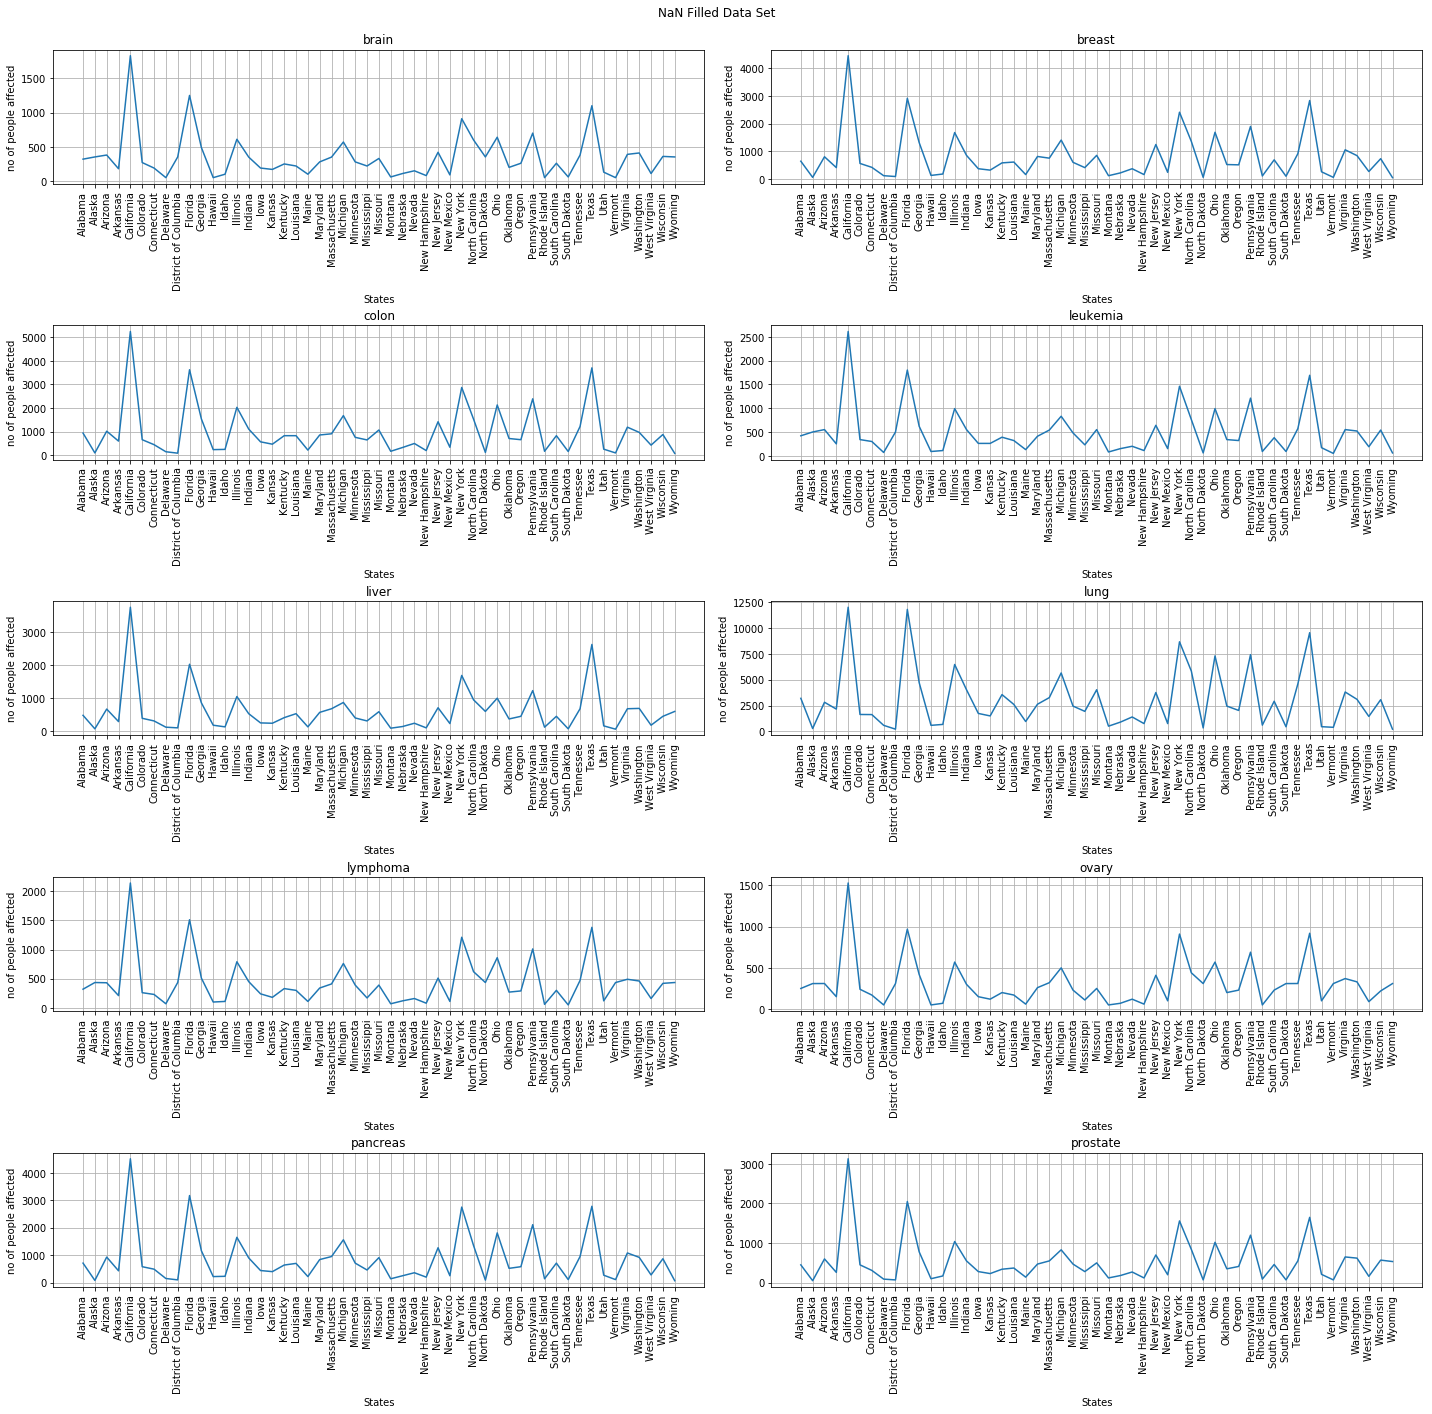

In [63]:
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('NaN Filled Data Set')

for row in ax:
    for col in row:
        col.plot(bdf[x],bdf[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Visualization 2: Bar Chart

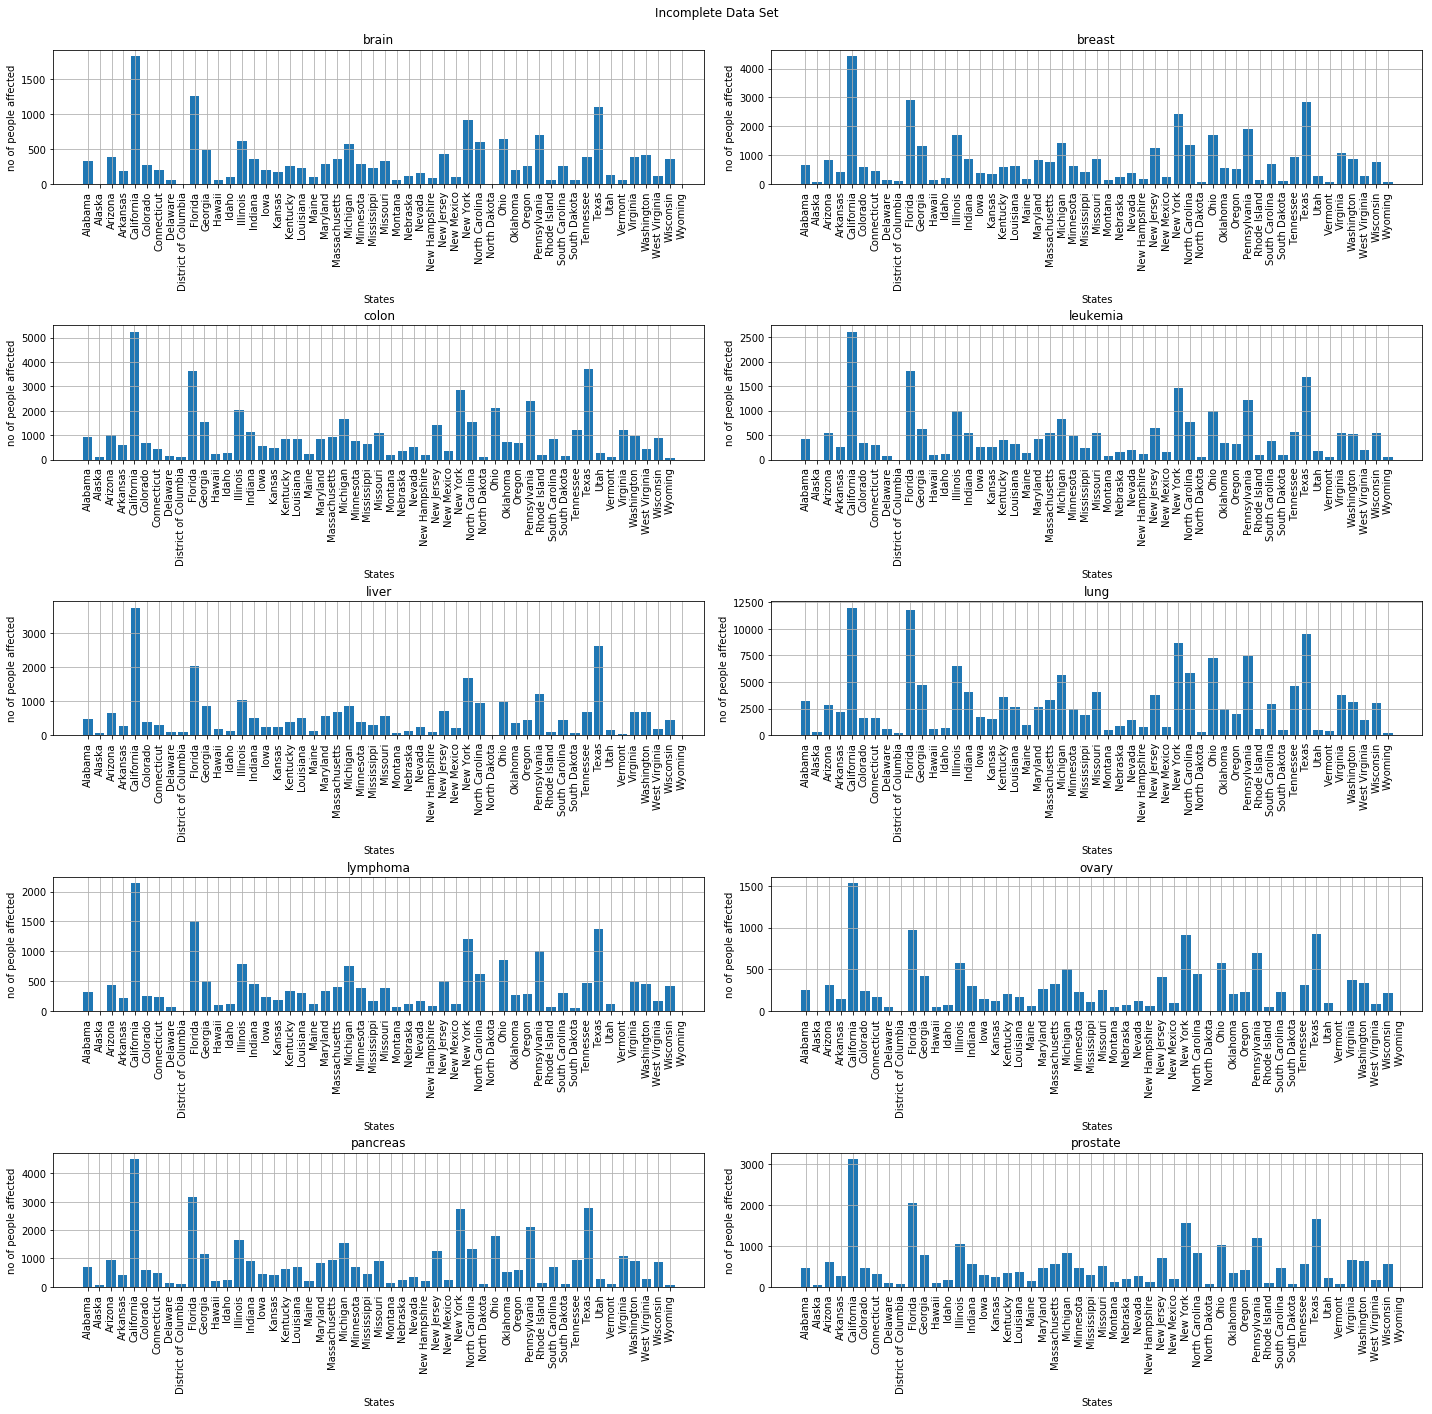

In [64]:
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('Incomplete Data Set')

for row in ax:
    for col in row:
        col.bar(df[x],df[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

After fixing the inconsistent data

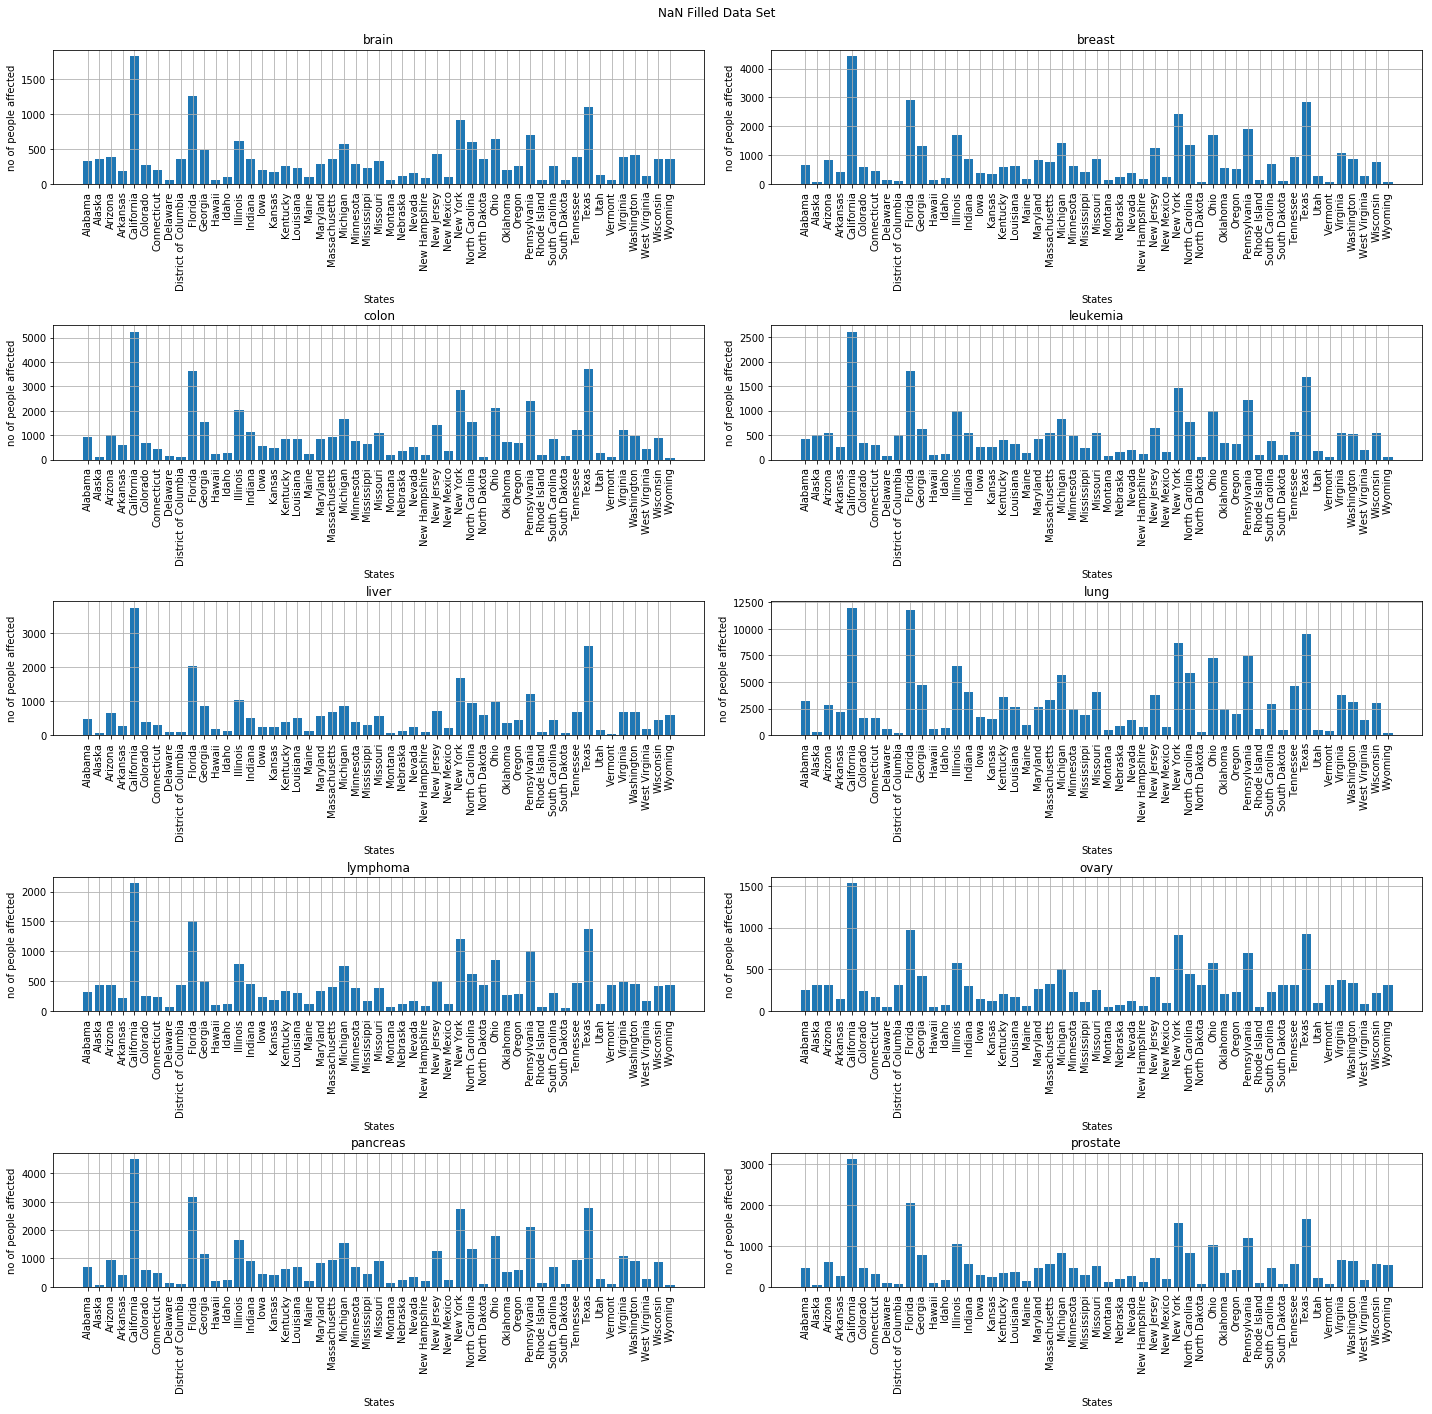

In [65]:
i=1
fig,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,20))
fig.suptitle('NaN Filled Data Set')

for row in ax:
    for col in row:
        col.bar(bdf[x],bdf[y[i]])
        i=i+1
i=0
for ax in fig.axes:
    plt.xlabel('States')
    plt.ylabel("no of people affected")
    plt.title(z[i])
    i=i+1
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.grid()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Visualization 3: Plotly maps

In [69]:
usa=df.copy()
for col in range(1,len(y)):
    usa[y[col]].fillna((usa[y[col]].mean()), inplace=True)

usa['total']=usa.sum(axis=1)
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa['code']=states
for col in usa.columns:
    usa[col] = usa[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

usa['text'] =' State: '+ usa['State'] + '<br>' +\
    ' Brain/nervoussystem: '+usa['Brain/nervoussystem']+'<br>'+' Femalebreast: '+usa['Femalebreast']+'<br>'+\
    ' Colon&rectum: '+usa['Colon&rectum']+'<br>'+ ' Leukemia: ' + usa['Leukemia']+'<br>'+\
    ' Liver: '+usa['Liver']+'<br>'+' Lungs&bronchus: ' + usa['Lung&bronchus']+'<br>'+\
    ' Non-HodgkinLymphoma: '+usa['Non-HodgkinLymphoma']+'<br>'+' Ovary: ' + usa['Ovary']+'<br>'+\
    ' Pancreas: '+usa['Pancreas']+'<br>'+' Prostate: ' + usa['Prostate']
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = usa['code'],
        z = usa['total'].astype(float),
        locationmode = 'USA-states',
        text = usa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No of People")
        ) ]

layout = dict(
        title = '2017 Cancer Statistics of U.S.A<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Visualization 4: Correlation between various types of cancer

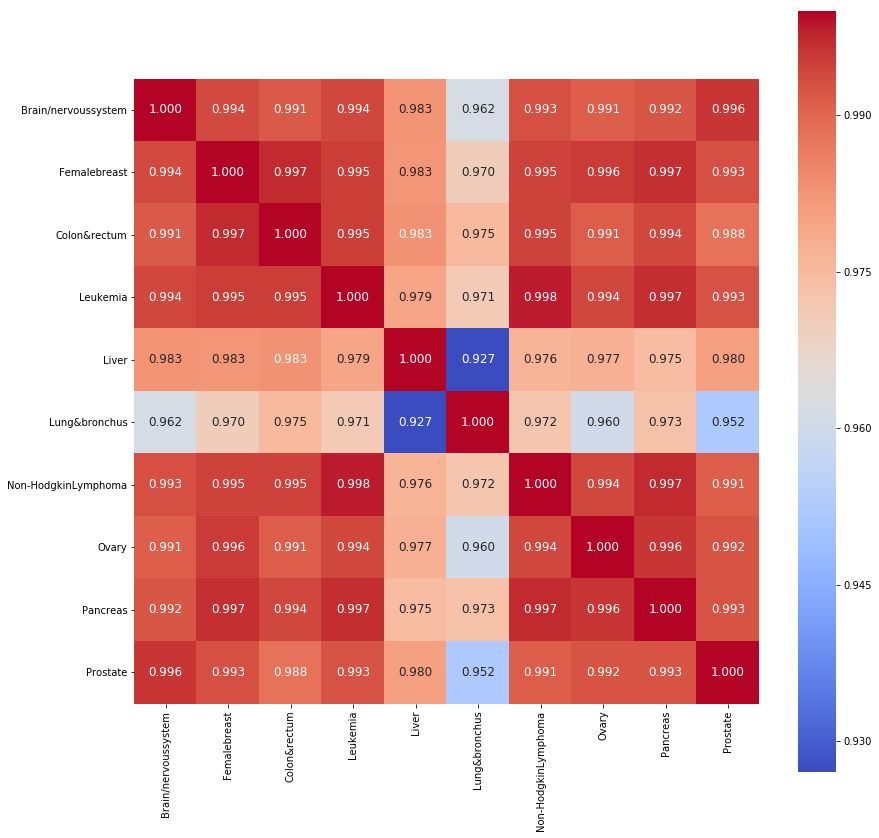

In [76]:
cancertypes=list(df.columns[1:df.shape[1]])
corr = df[cancertypes].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 12},
           xticklabels= cancertypes, yticklabels= cancertypes,
           cmap= 'coolwarm')

High correlation of two different cancer types shows that patients who are affected by a type of cancer is most likely to be vulnerable to the other type also. For example a patient who suffers from leukemia is prone to Non-Hdgkin Lymphoma.

Visualization 5: Cancer comparison with seaborn horizontal bar

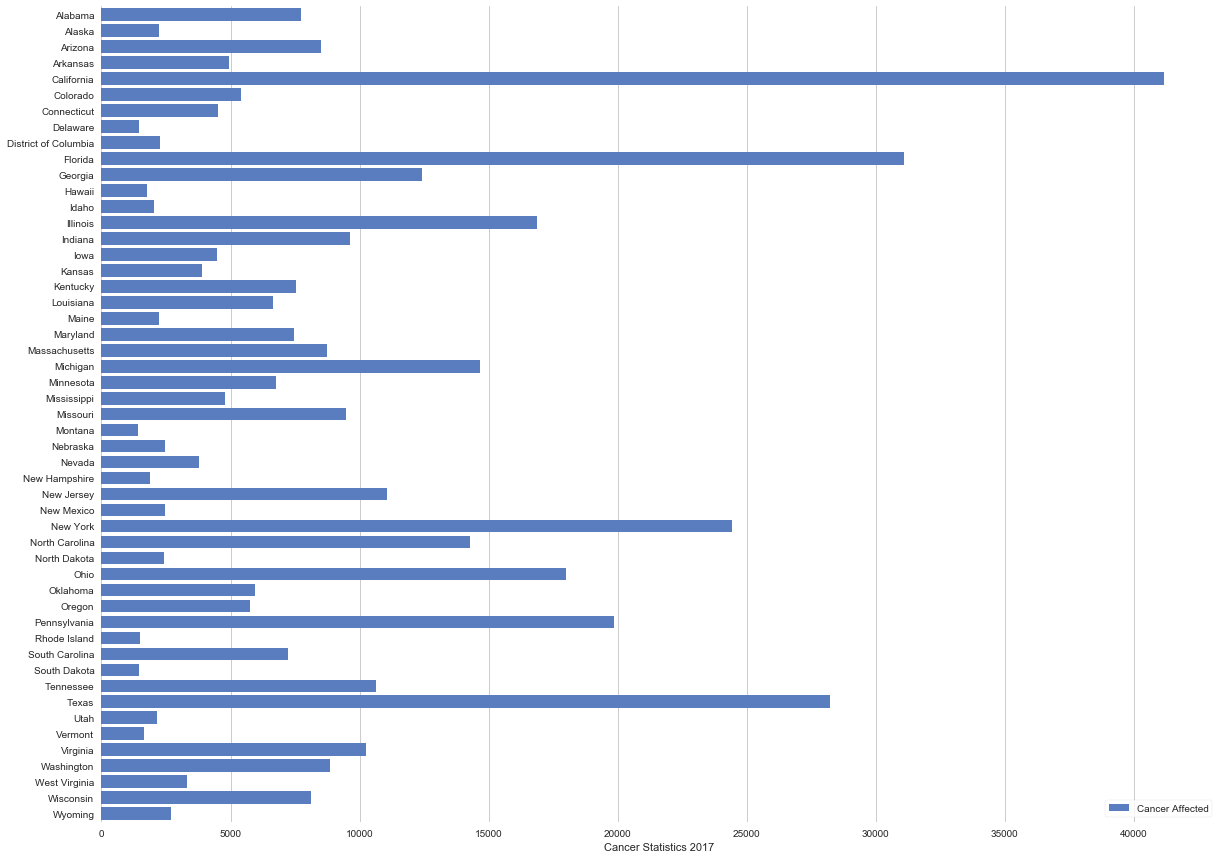

In [104]:

[float(i) for i in popstates]
usa['totpop']=popstates
usa['canpop']=usa['total'].astype(float)
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 15))

sns.barplot(x=usa['canpop'],y=usa['State'],
            label="Cancer Affected", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Cancer Statistics 2017")
sns.despine(left=True, bottom=True)

Now we are done with exploratory data analysis and visualizations